In [24]:
import numpy as np
import zipfile
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import itertools
import matplotlib
from matplotlib import markers
import matplotlib.transforms as transforms

In [25]:
import matplotlib.text as mtext

class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
        handlebox.add_artist(title)
        return title


In [3]:
datafile = pd.read_csv("/media/camila/Datos/proyectos/newpipe/classification/manual_alldices4.csv")
datafile2 = pd.read_csv("/media/camila/Datos/proyectos/newpipe/classification/dl_alldices4.csv")
datafile3 = pd.read_csv("/media/camila/Datos/proyectos/newpipe/classification/alldices4.csv")

In [49]:
datafile4 = pd.read_csv("/media/camila/Datos/proyectos/newpipe/classification/alldices-twodl.csv")

NameError: name 'datafile' is not defined

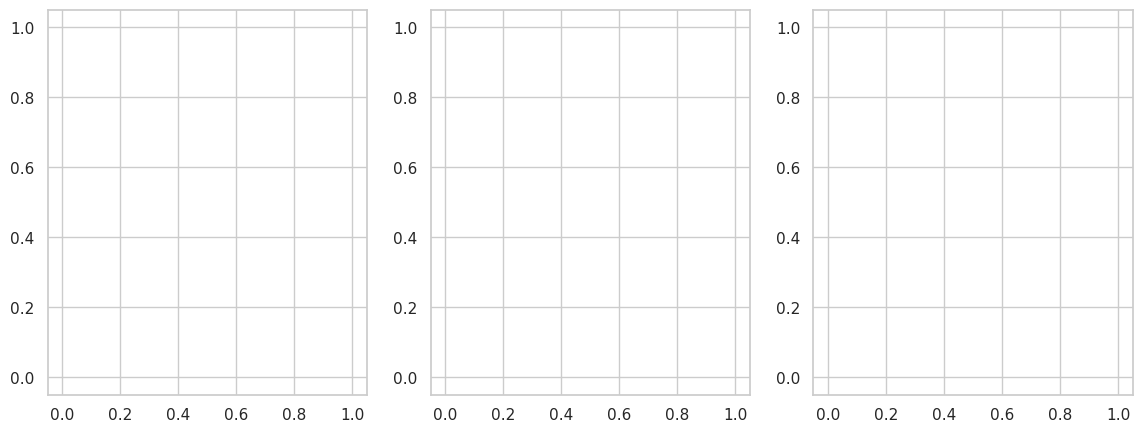

In [2]:
palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']

sns.set_theme(style="whitegrid",font_scale = 1)
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

plt.setp(axes, xticks=list(np.arange(0, 1.2, 0.2)),
        yticks=list(np.arange(0, 1.2, 0.2)), xlim=[-0.05,1.05], ylim=[-0.05,1.05])
sns.set_style("ticks")
dice= sns.boxplot(ax=axes[0],x='Method',y='Dice', hue='SubMethod',data=datafile, palette=sns.cubehelix_palette(),notch=False)
recall= sns.boxplot(ax=axes[1],x='Method',y='Re', hue='SubMethod',data=datafile, palette=sns.cubehelix_palette(),notch=False)
precision= sns.boxplot(ax=axes[2],x='Method',y='Pr', hue='SubMethod',data=datafile, palette=sns.cubehelix_palette(),notch=False)


dice.set_xlabel( '')
recall.set_xlabel( '')
precision.set_xlabel( '')
plt.legend(title='SubMethod')
plt.tight_layout()
#plt.savefig('ablation_OC.pdf')

ValueError: Could not interpret input 'Dice'

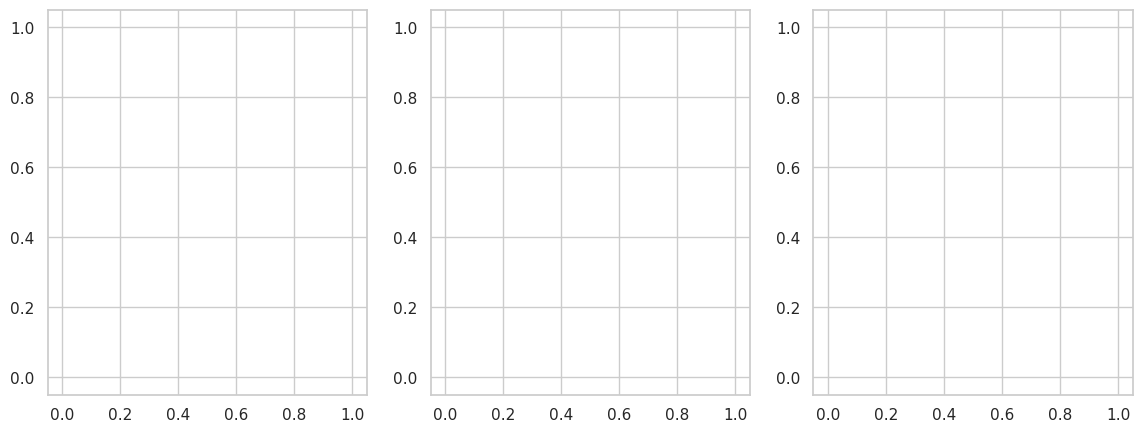

In [ ]:
palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']

sns.set_theme(style="whitegrid",font_scale = 1)
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

plt.setp(axes, xticks=list(np.arange(0, 1.2, 0.2)),
        yticks=list(np.arange(0, 1.2, 0.2)), xlim=[-0.05,1.05], ylim=[-0.05,1.05])

dice= sns.boxplot(ax=axes[0],x='Method',y='Dice', hue='SubMethod',data=datafile, palette=sns.cubehelix_palette(),notch=False)
recall= sns.boxplot(ax=axes[1],x='Method',y='Re', hue='SubMethod',data=datafile, palette=sns.cubehelix_palette(),notch=False)
precision= sns.boxplot(ax=axes[2],x='Method',y='Pr', hue='SubMethod',data=datafile, palette=sns.cubehelix_palette(),notch=False)

hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
numSM = len(datafile.SubMethod.unique())
print(numSM)
allplots=[dice, recall, precision]
for metric in allplots:
        hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
        for i, bar in enumerate(metric.patches):
                if i % numSM == 0:
                        hatch = next(hatches)
                bar.set_hatch(hatch)
        metric.set_xlabel( '')
plt.legend(title='SubMethod')
plt.tight_layout()
plt.savefig("/media/camila/Datos/proyectos/newpipe/classification/manual_alldices2.eps")

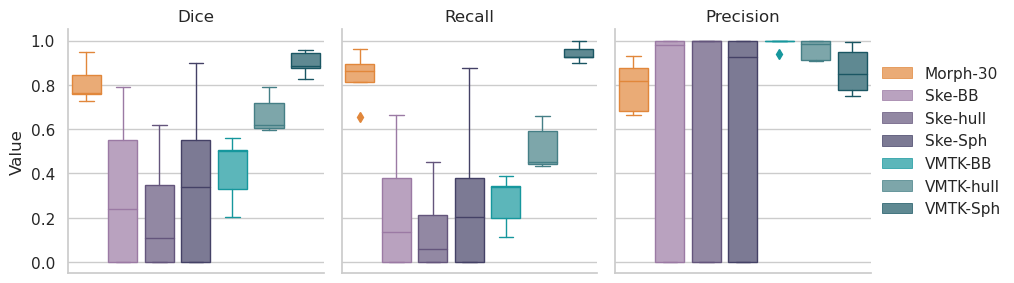

In [ ]:
palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']

palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]


linewidth=1.0

boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  markeredgecolor='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')


sns.set_theme(style="whitegrid",font_scale = 1)
dice = sns.FacetGrid(datafile, col="Metric")
dice.map_dataframe(sns.boxplot, x='Method',y='Value', hue='Method', dodge=False,linewidth=1.0, palette=palette)
dice.set_axis_labels("", "Value")
dice.set(xlabel=None,xticklabels=[])
dice.set_titles("{col_name}")
dice.set_xlabels("")
dice.tight_layout()
for ax in dice.axes[0]:
        trackbox=0
        trackrect=0
        for i,artist in enumerate(ax.patches):
                # Set the linecolor on the artist to the facecolor, and set the facecolor to None
                col = artist.get_facecolor()
                artist.set_edgecolor(col)
                alpha = 0.7
                fcol = ((1.0-alpha)+alpha*col[0],(1.0-alpha)+alpha*col[1],(1.0-alpha)+alpha*col[2],1)
                artist.set_facecolor(fcol)

                # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
                # Loop over them here, and use the same colour as above
                if len(artist.get_label()) != 0:
                        for j in range(trackbox*6,trackbox*6+6):
                                line = ax.lines[j]
                                line.set_color(col)
                                line.set_mfc(col)
                                line.set_mec(col)
                        trackbox=trackbox+1
                else:
                        trackrect=trackrect+1

dice.add_legend()
dice.savefig("/media/camila/Datos/proyectos/newpipe/classification/manual_alldicesbox.eps")


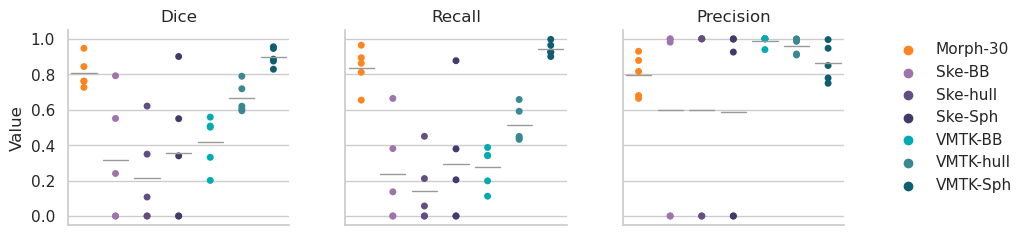

In [ ]:
palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]


linewidth=1.0

sns.set_theme(style="whitegrid",font_scale = 1)
dice = sns.FacetGrid(datafile, col="Metric")
dice.map_dataframe(sns.stripplot, x='Method',y='Value', hue='Method', dodge=False,palette=palette, jitter=False)
dice.set_axis_labels("", "Value")
dice.set(xlabel=None,xticklabels=[])
dice.set_titles("{col_name}")
dice.set_xlabels("")
dice.tight_layout()
dice.set(xlabel=None,xticklabels=[])
dice.add_legend()

# plot the mean line
dice.map_dataframe(sns.boxplot,showmeans=True,
                meanline=True,
                meanprops={'color': '#999999', 'ls': '-', 'lw': 1},
                medianprops={'visible': False},
                whiskerprops={'visible': False},
                zorder=10,
                x="Method",
                y="Value",
                data=datafile,
                showfliers=False,
                showbox=False,
                showcaps=False,
                ax=ax)

dice.set(xlabel=None,xticklabels=[])
#dice.savefig("/media/camila/Datos/proyectos/newpipe/classification/manual_alldicespoint.eps")

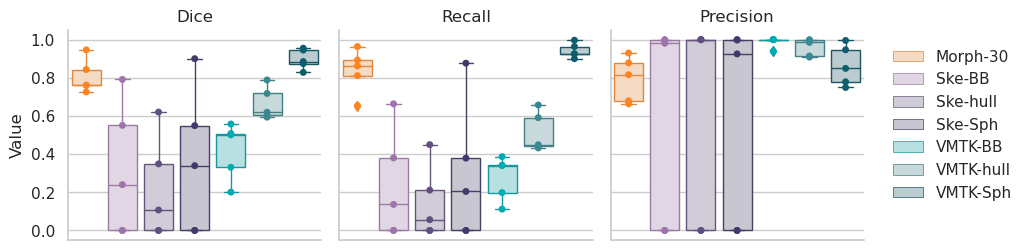

In [ ]:
palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']

palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]


linewidth=1.0

boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  markeredgecolor='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')


sns.set_theme(style="whitegrid",font_scale = 1)
dice = sns.FacetGrid(datafile, col="Metric")
dice.map_dataframe(sns.boxplot, x='Method',y='Value', hue='Method', dodge=False,linewidth=1.0, palette=palette)
dice.set_axis_labels("", "Value")
dice.set(xlabel=None,xticklabels=[])
dice.set_titles("{col_name}")
dice.set_xlabels("")
dice.tight_layout()
for ax in dice.axes[0]:
        trackbox=0
        trackrect=0
        for i,artist in enumerate(ax.patches):
                # Set the linecolor on the artist to the facecolor, and set the facecolor to None
                col = artist.get_facecolor()
                artist.set_edgecolor(col)
                alpha = 0.3
                fcol = ((1.0-alpha)+alpha*col[0],(1.0-alpha)+alpha*col[1],(1.0-alpha)+alpha*col[2],1)
                artist.set_facecolor(fcol)

                # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
                # Loop over them here, and use the same colour as above
                if len(artist.get_label()) != 0:
                        for j in range(trackbox*6,trackbox*6+6):
                                line = ax.lines[j]
                                line.set_color(col)
                                line.set_mfc(col)
                                line.set_mec(col)
                        trackbox=trackbox+1
                else:
                        trackrect=trackrect+1

dice.add_legend()
dice.map_dataframe(sns.stripplot,jitter=False,
                x="Method",
                y="Value",
                palette=palette,
                hue="Method",
                data=datafile,             
                ax=ax)

dice.set(xlabel=None,xticklabels=[])
        #sns.stripplot(x='Method',y='Value', hue='Method', dodge=False,palette=palette, jitter=False, ax=ax)
#dice.savefig("/media/camila/Datos/proyectos/newpipe/classification/manual_alldicesbox.eps")


AxesSubplot(0.05075,0.1335;0.26282x0.789833)
[]
AxesSubplot(0.34581,0.1335;0.26282x0.789833)
[]
AxesSubplot(0.64087,0.1335;0.26282x0.789833)
[]


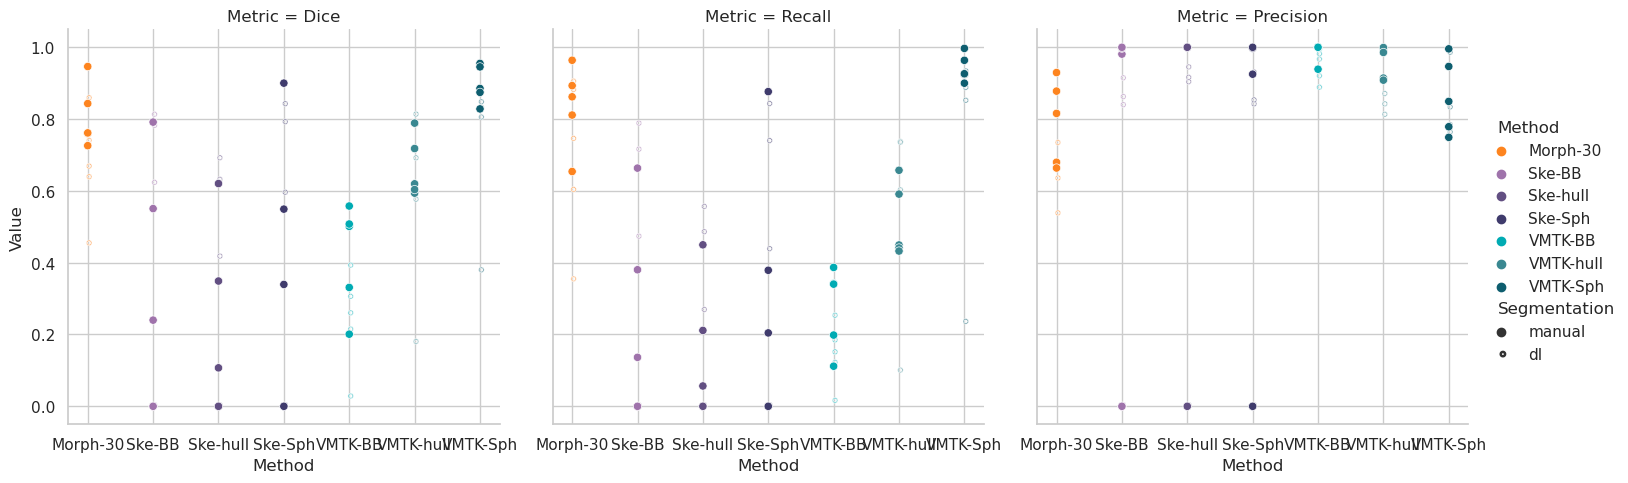

In [ ]:
palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]

manual = datafile3[datafile3["Segmentation"]=="manual"]
dl = datafile3[datafile3["Segmentation"]=="dl"]

markerstyle = ["o","$\circ$"]
markerstyle2 = ["p","p"]
edgecolors = ["face","none"]
linewidth=1.0

sns.set_theme(style="whitegrid",font_scale = 1)
dice = sns.relplot(datafile3, col="Metric", x='Method',
        y='Value', hue='Method', 
        palette=palette, 
        style="Segmentation",
        style_order=["manual", "dl"],
        markers=markerstyle,
        edgecolors=edgecolors)

dice2 = sns.scatterplot(data=datafile3,
        x="Method",
        y='Value', hue='Method', 
        palette=palette, 
        style="Segmentation",
        style_order=["manual", "dl"],
        markers=markerstyle2,
        ax=dice.axes[0])

for ax in dice.axes[0]:
        trackbox=0
        trackrect=0
        print(ax)
        print(ax.figure.patches)
        for i,artist in enumerate(ax.patches):
                print(artist)
                # Set the linecolor on the artist to the facecolor, and set the facecolor to None
                col = artist.get_facecolor()
                artist.set_edgecolor(col)
                alpha = 0.7
                fcol = ((1.0-alpha)+alpha*col[0],(1.0-alpha)+alpha*col[1],(1.0-alpha)+alpha*col[2],1)
                artist.set_facecolor(fcol)

                # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
                # Loop over them here, and use the same colour as above
                if len(artist.get_label()) != 0:
                        for j in range(trackbox*6,trackbox*6+6):
                                line = ax.lines[j]
                                line.set_color(col)
                                line.set_mfc(col)
                                line.set_mec(col)
                        trackbox=trackbox+1
                else:
                        trackrect=trackrect+1        
# dice.set_axis_labels("", "Value")
# dice.set(xlabel=None,xticklabels=[])
# dice.set_titles("{col_name}")
# dice.set_xlabels("")
# dice.tight_layout()
# dice.set(xlabel=None,xticklabels=[])
# dice.add_legend()

# dice.map_dataframe(sns.stripplot, 
#                     x='Method',
#                     y='Value', 
#                     hue='Method', 
#                     dodge=False,
#                     palette=palette, 
#                     jitter=False,
#                     data=datafile2,
#                     ax=ax)

# # plot the mean line
# dice.map_dataframe(sns.boxplot,showmeans=True,
#                 meanline=True,
#                 meanprops={'color': '#999999', 'ls': '-', 'lw': 1},
#                 medianprops={'visible': False},
#                 whiskerprops={'visible': False},
#                 zorder=10,
#                 x="Method",
#                 y="Value",
#                 data=datafile,
#                 showfliers=False,
#                 showbox=False,
#                 showcaps=False,
#                 ax=ax)

# dice.set(xlabel=None,xticklabels=[])
#dice.savefig("/media/camila/Datos/proyectos/newpipe/classification/manual_alldicespoint.eps")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.transforms import Affine2D
from matplotlib.textpath import TextPath
from matplotlib.colors import Normalize

SUCCESS_SYMBOLS = [
    TextPath((0, 0), "☹"),
    TextPath((0, 0), "😒"),
    TextPath((0, 0), "☺"),
]

N = 25
np.random.seed(42)
skills = np.random.uniform(5, 80, size=N) * 0.1 + 5
takeoff_angles = np.random.normal(0, 90, N)
thrusts = np.random.uniform(size=N)
successful = np.random.randint(0, 3, size=N)
positions = np.random.normal(size=(N, 2)) * 5
data = zip(skills, takeoff_angles, thrusts, successful, positions)

cmap = plt.colormaps["plasma"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for skill, takeoff, thrust, mood, pos in data:
    t = Affine2D().scale(skill).rotate_deg(takeoff)
    m = MarkerStyle(SUCCESS_SYMBOLS[mood], transform=t)
    ax.plot(pos[0], pos[1], marker=m, color=cmap(thrust))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 1), cmap=cmap),
             ax=ax, label="Normalized Thrust [a.u.]")
ax.set_xlabel("X position [m]")
ax.set_ylabel("Y position [m]")

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


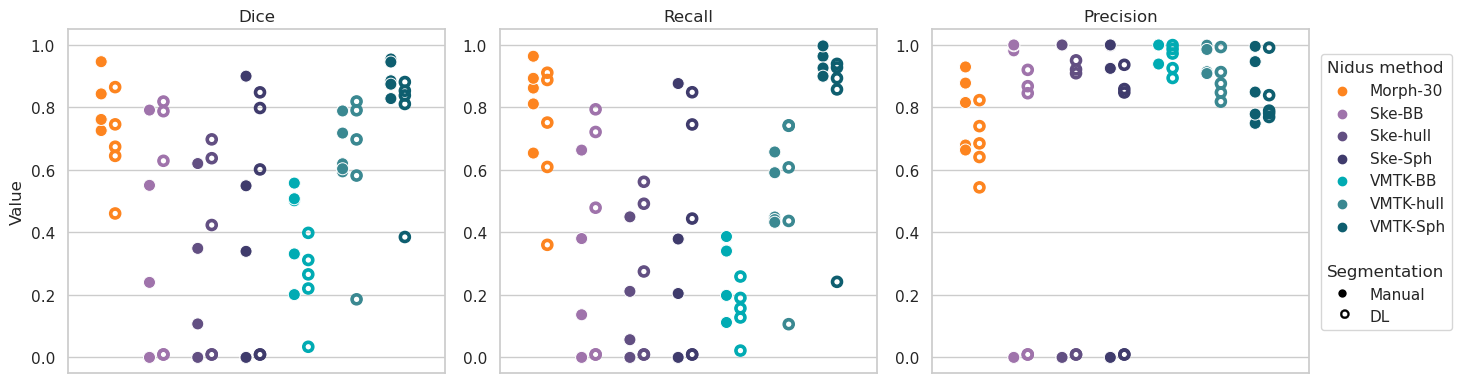

In [ ]:
palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']
palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palettee = ["#FFFFFF","#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF","#FFFFFF", "#FFFFFF"]

paletteg = ["#999999", "#999999", "#999999", "#999999", "#999999", "#999999", "#999999"]
manual = datafile3[datafile3["Segmentation"]=="manual"]
dl = datafile3[datafile3["Segmentation"]=="dl"]

sns.set_theme(style="whitegrid",font_scale = 1)
sns.set_style({'xtick.color' : "white"})
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

plt.setp(axes, yticks=list(np.arange(0, 1.2, 0.2)), ylim=[-0.05,1.05], xlim=[-0.8,7.0], xticks=[])
#sns.despine(left=True)
i =3
metrics = ["Dice", "Recall", "Precision"]
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans) #to shift the location


pnts = np.linspace(0, np.pi * 2.0, 40)
circ = np.c_[np.sin(pnts) / 2, -np.cos(pnts) / 2]
vert = np.r_[circ, circ[::-1] * .55]
open_circle = matplotlib.path.Path(vert, closed=True) #Cirle with no fill
kwargs = {'edgecolor':None,'linewidth':2,"facecolor":None}


for ax in range(i):
        subm = datafile[datafile["Metric"] == metrics[ax]]
        subd = datafile2[datafile2["Metric"] == metrics[ax]]
        axes[ax].set_title(metrics[ax])
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subm, palette=palette, ax=axes[ax],s=75,transform=axes[ax].transData-offset(4))
        # sns.boxplot(x="Method", y="Value", data=subm, ax=axes[ax],showmeans=True,
        #         meanline=True,
        #         meanprops={'color': '#999999', 'ls': '-', 'lw': 1},
        #         medianprops={'visible': False},
        #         whiskerprops={'visible': False},
        #         zorder=10,showfliers=False,
        #         showbox=False,
        #         showcaps=False,
        #         width=0.5)     
                
        sns.scatterplot(x='Method',y=0, hue="Method", data=subm, palette=paletteg, ax=axes[ax], legend=False,s=0, marker="+", lw=0)
        # sns.scatterplot(x='Method',y='Value', hue="Method",data=subd, palette=palette, ax=axes[ax], legend=False, s=80, 
        #                         marker=open_circle,lw=0,transform=axes[ax].transData+offset(5))
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subd, palette=palette, ax=axes[ax], legend=False, s=150, marker="$\circ$", lw=.5, ec="face",
                                transform=axes[ax].transData+offset(4))
        #(
        # sns.objects.Plot(subm, x='Method',y='Value', color="Method", palette=palette, transform=axes[ax].transData+offset(4))
        # .add(sns.Dot(fill=False, stroke=2, pointsize=8))
        # .on(axes[ax])
        # )
        axes[ax].set_ylabel("")
axes[0].set_ylabel("Value")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
handles, labels = axes[0].get_legend_handles_labels()
handles.extend([#plt.Line2D([0,0],[0,0], linestyle=''),
                plt.Line2D([0,0],[0,0], markeredgecolor="none",
                      marker='o', markerfacecolor='black',
                      mew=0.3,
                      linestyle=''),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker="$\circ$", markerfacecolor='black', markersize=10,
                      mew=0.3,
                      linestyle='',
                      lw=2)])
labels.extend([#"", 
                "Manual", "DL"])
for ax in axes:
        ax.get_legend().remove()
#plt.legend(handles, labels, bbox_to_anchor=(1.4, 0.5), loc="center right")
plt.legend(['Nidus method'] + handles[:7] + ['','Segmentation'] + handles[7:], 
          ['']         + labels[:7] + ['','']          + labels[7:],
           handler_map={str: LegendTitle({'fontsize': 12})},
          bbox_to_anchor=(1.4, 0.95)
        )
plt.tight_layout()
plt.savefig("/media/camila/Datos/proyectos/newpipe/classification/fivecases.eps")

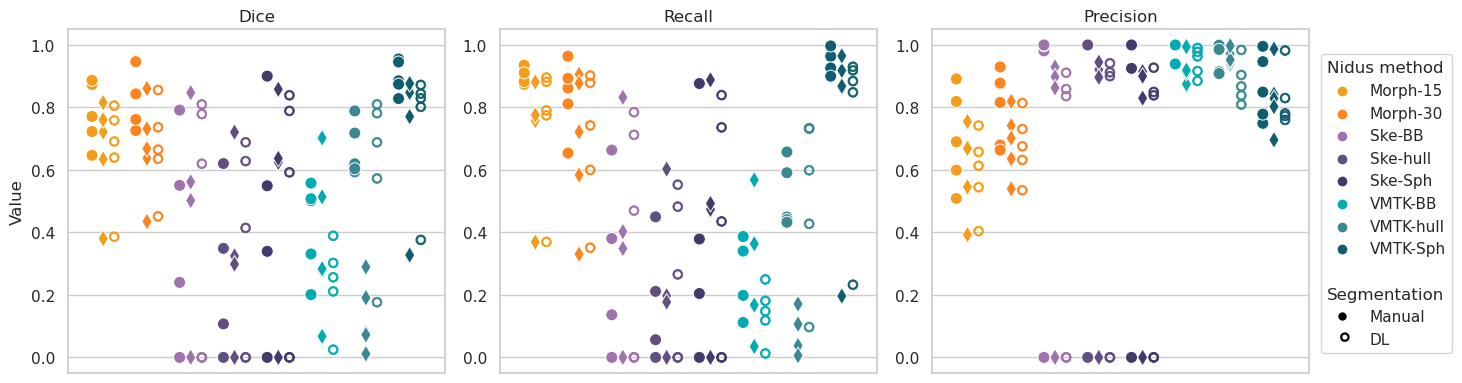

In [ ]:
import matplotlib.path as mpath

palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']
palette = ["#F49D1A","#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palettee = ["#FFFFFF","#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF","#FFFFFF", "#FFFFFF"]
paletteg = ["#999999", "#999999", "#999999", "#999999", "#999999", "#999999", "#999999"]

manual = datafile4[datafile4["Segmentation"]=="manual"]
dl = datafile4[datafile4["Segmentation"]=="dl"]
dldice = datafile4[datafile4["Segmentation"]=="dldice"]

sns.set_theme(style="whitegrid",font_scale = 1)
sns.set_style({'xtick.color' : "white"})
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

plt.setp(axes, yticks=list(np.arange(0, 1.2, 0.2)), ylim=[-0.05,1.05], xlim=[-0.8,7.8], xticks=[])
#sns.despine(left=True)
i =3
metrics = ["Dice", "Recall", "Precision"]
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans) #to shift the location


# pnts = np.linspace(0, np.pi * 2.0, 40)
# circ = np.c_[np.sin(pnts) / 2, -np.cos(pnts) / 2]
# vert = np.r_[circ, circ[::-1] * .55]
# open_circle = matplotlib.path.Path(vert, closed=True) #Cirle with no fill
# kwargs = {'edgecolor':None,'linewidth':2,"facecolor":None}
#circle = mpath.Path.unit_circle()
bcircle = mpath.Path.circle(radius=1.0)
tcircle = mpath.Path.circle(radius=0.7)
cut_circle = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, tcircle.vertices[::-1, ...]]),
    codes=np.concatenate([bcircle.codes, tcircle.codes]))

for ax in range(i):
        subm = manual[manual["Metric"] == metrics[ax]]
        subd = dl[dl["Metric"] == metrics[ax]]
        subdd = dldice[dldice["Metric"] == metrics[ax]]
        axes[ax].set_title(metrics[ax])
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subm, palette=palette, ax=axes[ax],s=75,transform=axes[ax].transData-offset(8))
                
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subdd, palette=palette, ax=axes[ax],s=75, marker="d", legend=False)
        # sns.scatterplot(x='Method',y='Value', hue="Method",data=subd, palette=palette, ax=axes[ax], legend=False, s=80, 
        #                         marker=open_circle,lw=0,transform=axes[ax].transData+offset(5))
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subd, palette=palette, ax=axes[ax], legend=False, s=50, marker=cut_circle, lw=.5, ec="face",
                                transform=axes[ax].transData+offset(8))
        #(
        # sns.objects.Plot(subm, x='Method',y='Value', color="Method", palette=palette, transform=axes[ax].transData+offset(4))
        # .add(sns.Dot(fill=False, stroke=2, pointsize=8))
        # .on(axes[ax])
        # )
        axes[ax].set_ylabel("")
axes[0].set_ylabel("Value")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
handles, labels = axes[0].get_legend_handles_labels()
handles.extend([#plt.Line2D([0,0],[0,0], linestyle=''),
                plt.Line2D([0,0],[0,0], markeredgecolor="none",
                      marker='o', markerfacecolor='black',
                      mew=0.3,
                      linestyle=''),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker="$\circ$", markerfacecolor='black', markersize=10,
                      mew=0.3,
                      linestyle='',
                      lw=2)])
labels.extend([#"", 
                "Manual", "DL"])
for ax in axes:
        ax.get_legend().remove()
#plt.legend(handles, labels, bbox_to_anchor=(1.4, 0.5), loc="center right")
plt.legend(['Nidus method'] + handles[:8] + ['','Segmentation'] + handles[8:], 
          ['']         + labels[:8] + ['','']          + labels[8:],
           handler_map={str: LegendTitle({'fontsize': 12})},
          bbox_to_anchor=(1.4, 0.95)
        )
plt.tight_layout()
#plt.savefig("/media/camila/Datos/proyectos/newpipe/classification/fivecases.eps")

In [3]:
datafile5 = pd.read_csv("C:\\Users\\Camila\\Documents\\Doctorado\\dices\\alldices-twodl-intentos.csv")

In [5]:
datafile5 = datafile5[datafile5["Method"]!= "Morph-30"]

C:\Users\Camila\AppData\Local\Temp\ipykernel_23348\345039080.py:64: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.scatterplot(x='Method',y='Value', hue="Method", data=submtries, palette=palettee, ax=axes[ax], legend=False,s=78, marker=linepath4, lw=5,transform=axes[ax].transData-offset(6))
C:\Users\Camila\AppData\Local\Temp\ipykernel_23348\345039080.py:71: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x='Method',y='Value', hue="Method",data=subdtries, palette=palettesubske, ax=axes[ax], legend=False, s=50, marker=linepath4, lw=5, ec="face",
C:\Users\Camila\AppData\Local\Temp\ipykernel_23348\345039080.py:64: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.scatterplot(x='Method',y='Value', hue="Method", data=submtries, palette=palettee, ax=axes[ax], legend=False,s=78, marker=linepath4, lw=5,transform=axes[ax].transData

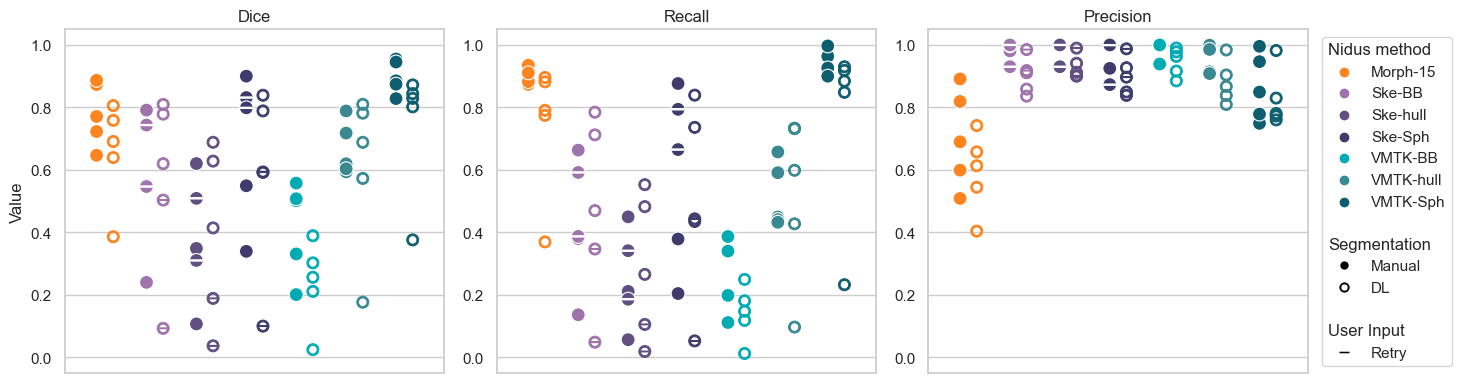

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [14]:
import matplotlib.path as mpath
from matplotlib.markers import MarkerStyle

palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']
#palette = ["#F49D1A","#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palettee = ["#FFFFFF","#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF","#FFFFFF", "#FFFFFF"]
paletteg = ["#999999", "#999999", "#999999", "#999999", "#999999", "#999999", "#999999"]
palettesubske = ["#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
datafile5 = datafile5[datafile5["Method"]!= "Morph-30"]

manual = datafile5[datafile5["Segmentation"]=="manual"]
dl = datafile5[datafile5["Segmentation"]=="dl"]
dldice = datafile5[datafile5["Segmentation"]=="dldice"]

sns.set_theme(style="whitegrid",font_scale = 1)
sns.set_style({'xtick.color' : "white"})
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

plt.setp(axes, yticks=list(np.arange(0, 1.2, 0.2)), ylim=[-0.05,1.05], xlim=[-0.8,6.8], xticks=[])
#sns.despine(left=True)
i =3
metrics = ["Dice", "Recall", "Precision"]
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans) #to shift the location


# pnts = np.linspace(0, np.pi * 2.0, 40)
# circ = np.c_[np.sin(pnts) / 2, -np.cos(pnts) / 2]
# vert = np.r_[circ, circ[::-1] * .55]
# open_circle = matplotlib.path.Path(vert, closed=True) #Cirle with no fill
# kwargs = {'edgecolor':None,'linewidth':2,"facecolor":None}
#circle = mpath.Path.unit_circle()
bcircle = mpath.Path.circle(radius=1.0)
tcircle = mpath.Path.circle(radius=0.7)
cut_circle = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, tcircle.vertices[::-1, ...]]),
    codes=np.concatenate([bcircle.codes, tcircle.codes]))

linepath2 = mpath.Path([ (-1.0, 0.0), (-0.25, 0.0),(0.25, 0.0),(1.0, 0.0),(1.0, 0.0)],[mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,mpath.Path.CLOSEPOLY])
linepath = mpath.Path.hatch("|")
linepath3 = mpath.Path.unit_regular_polygon(2)
circle_line = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, linepath2.vertices]),
    codes=np.concatenate([bcircle.codes, linepath2.codes]))
linepath4 = mpath.Path([ (-0.9, 0.1), (-0.25, 0.1),(0.25, 0.1),(0.9, 0.1),
                                (0.9, 0.0),(0.25,  0.0),(-0.25,  0.0),(-0.9,  0.0),
                                (-0.9, -0.1),(-0.25, -0.1),(0.25, -0.1),(0.9, -0.1),
                                (0.9, -0.1) ],
                [mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, 
                mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,
                        mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, mpath.Path.CLOSEPOLY])

#print (circle_line.vertices)


for ax in range(i):
        subm = manual[manual["Metric"] == metrics[ax]]
        submtries = subm[subm["Tries"] != 0]
        subd = dl[dl["Metric"] == metrics[ax]]
        subdtries = subd[subd["Tries"] != 0]
        subdd = dldice[dldice["Metric"] == metrics[ax]]
        axes[ax].set_title(metrics[ax])
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subm, palette=palette, ax=axes[ax],s=100,transform=axes[ax].transData-offset(6))
        sns.scatterplot(x='Method',y='Value', hue="Method", data=submtries, palette=palettee, ax=axes[ax], legend=False,s=78, marker=linepath4, lw=5,transform=axes[ax].transData-offset(6))
                
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subdd, palette=palette, ax=axes[ax],s=0, marker="d", legend=False)
        # sns.scatterplot(x='Method',y='Value', hue="Method",data=subd, palette=palette, ax=axes[ax], legend=False, s=80, 
        #                         marker="o",lw=0,transform=axes[ax].transData+offset(5))
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subd, palette=palette, ax=axes[ax], legend=False, s=75, marker=cut_circle, lw=.5, ec="face",
                                transform=axes[ax].transData+offset(6))
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subdtries, palette=palettesubske, ax=axes[ax], legend=False, s=50, marker=linepath4, lw=5, ec="face",
                                transform=axes[ax].transData+offset(6))
        # sns.scatterplot(x='Method',y='Value', hue="Method", data=subdtries, palette=palettesubske, ax=axes[ax], legend=False, s=100, marker=linepath4,
        #                         transform=axes[ax].transData+offset(8))
        #(
        # sns.objects.Plot(subm, x='Method',y='Value', color="Method", palette=palette, transform=axes[ax].transData+offset(4))
        # .add(sns.Dot(fill=False, stroke=2, pointsize=8))
        # .on(axes[ax])
        # )
        axes[ax].set_ylabel("")
axes[0].set_ylabel("Value")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
handles, labels = axes[0].get_legend_handles_labels()
handles.extend([#plt.Line2D([0,0],[0,0], linestyle=''),
                plt.Line2D([0,0],[0,0], markeredgecolor="none",
                      marker='o', markerfacecolor='black',
                      mew=0.3,
                      linestyle=''),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=cut_circle, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=linepath4, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2)])
labels.extend([#"", 
                "Manual", "DL", "Retry"])
for ax in axes:
        ax.get_legend().remove()

plt.legend(['Nidus method'] + handles[:7] + ['','Segmentation'] + handles[7:9] + ['','User Input'] + [handles[9]], 
          ['']         + labels[:7] + ['','']          + labels[7:9]+ ['','']          + [labels[9]],
           handler_map={str: LegendTitle({'fontsize': 12})},
          bbox_to_anchor=(1.4, 1.0)
        )
plt.tight_layout()
plt.show()
fig.savefig("C:\\Users\\Camila\\Documents\\Doctorado\\dices\\fivecases-tries.eps")

/tmp/ipykernel_374415/1018995925.py:69: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.scatterplot(x='Method',y='Value', hue="Method", data=submtries, palette=palettee, ax=subplotax, legend=False,s=110, marker=linepath4, lw=5,transform=subplotax.transData-offset(6))
/tmp/ipykernel_374415/1018995925.py:76: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x='Method',y='Value', hue="Method",data=subdtries, palette=palettesubske, ax=subplotax, legend=False, s=95, marker=linepath4, lw=5, ec="face",
/tmp/ipykernel_374415/1018995925.py:69: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.scatterplot(x='Method',y='Value', hue="Method", data=submtries, palette=palettee, ax=subplotax, legend=False,s=110, marker=linepath4, lw=5,transform=subplotax.transData-offset(6))
/tmp/ipykernel_374415/1018995925.py:76: UserWarning: The palette 

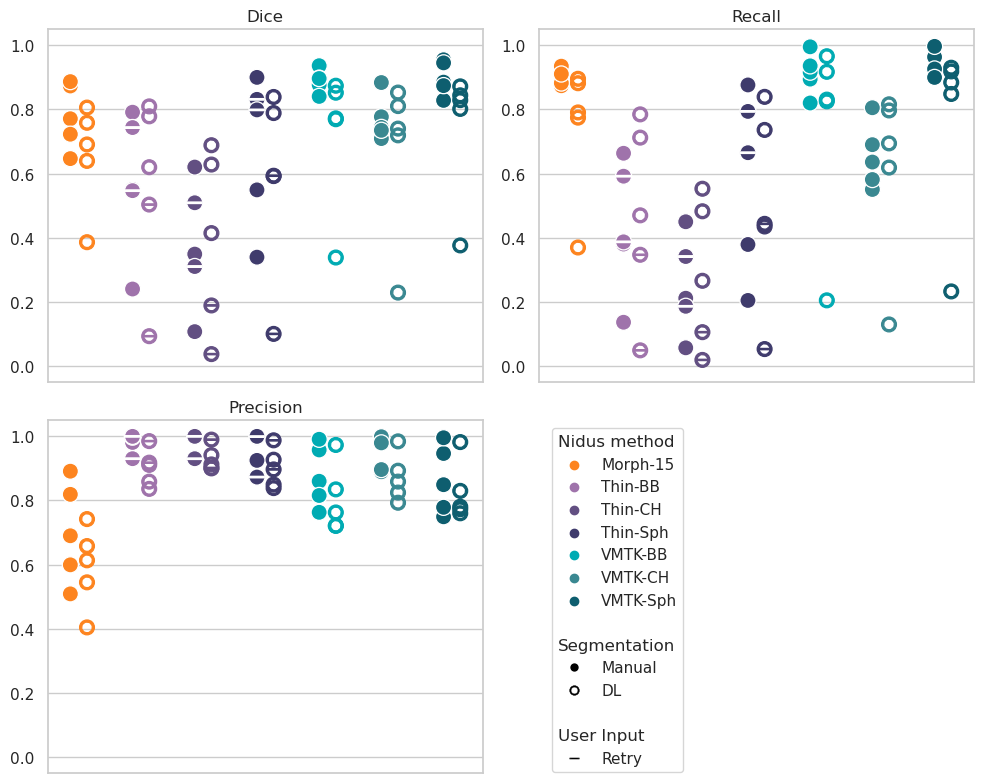

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [44]:
import matplotlib.path as mpath
from matplotlib.markers import MarkerStyle

datafile5 = pd.read_csv("/media/camila/Datos/proyectos/newpipe/classification/fivedices-fixed.csv")

palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']
#palette = ["#F49D1A","#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palettee = ["#FFFFFF","#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF","#FFFFFF", "#FFFFFF"]
paletteg = ["#999999", "#999999", "#999999", "#999999", "#999999", "#999999", "#999999"]
palettesubske = ["#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
datafile5 = datafile5[datafile5["Method"]!= "Morph-30"]

manual = datafile5[datafile5["Segmentation"]=="manual"]
dl = datafile5[datafile5["Segmentation"]=="dl"]
dldice = datafile5[datafile5["Segmentation"]=="dldice"]

sns.set_theme(style="whitegrid",font_scale = 1)
sns.set_style({'xtick.color' : "white"})
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

plt.setp(axes, yticks=list(np.arange(0, 1.2, 0.2)), ylim=[-0.05,1.05], xlim=[-0.5,6.5], xticks=[])
#sns.despine(left=True)
i =3
metrics = ["Dice", "Recall", "Precision"]
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans) #to shift the location

axescoords = [(0,0), (0,1), (1,0)]

# pnts = np.linspace(0, np.pi * 2.0, 40)
# circ = np.c_[np.sin(pnts) / 2, -np.cos(pnts) / 2]
# vert = np.r_[circ, circ[::-1] * .55]
# open_circle = matplotlib.path.Path(vert, closed=True) #Cirle with no fill
# kwargs = {'edgecolor':None,'linewidth':2,"facecolor":None}
#circle = mpath.Path.unit_circle()
bcircle = mpath.Path.circle(radius=1.0)
tcircle = mpath.Path.circle(radius=0.7)
cut_circle = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, tcircle.vertices[::-1, ...]]),
    codes=np.concatenate([bcircle.codes, tcircle.codes]))

linepath2 = mpath.Path([ (-1.0, 0.0), (-0.25, 0.0),(0.25, 0.0),(1.0, 0.0),(1.0, 0.0)],[mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,mpath.Path.CLOSEPOLY])
linepath = mpath.Path.hatch("|")
linepath3 = mpath.Path.unit_regular_polygon(2)
circle_line = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, linepath2.vertices]),
    codes=np.concatenate([bcircle.codes, linepath2.codes]))
linepath4 = mpath.Path([ (-0.9, 0.1), (-0.25, 0.1),(0.25, 0.1),(0.9, 0.1),
                                (0.9, 0.0),(0.25,  0.0),(-0.25,  0.0),(-0.9,  0.0),
                                (-0.9, -0.1),(-0.25, -0.1),(0.25, -0.1),(0.9, -0.1),
                                (0.9, -0.1) ],
                [mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, 
                mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,
                        mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, mpath.Path.CLOSEPOLY])

#print (circle_line.vertices)


for ax in range(i):
        subplotax=axes[axescoords[ax]]
        subm = manual[manual["Metric"] == metrics[ax]]
        submtries = subm[subm["Tries"] != 0]
        subd = dl[dl["Metric"] == metrics[ax]]
        subdtries = subd[subd["Tries"] != 0]
        subdd = dldice[dldice["Metric"] == metrics[ax]]
        subplotax.set_title(metrics[ax])
        subplotax.set_ylabel(metrics[ax])
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subm, palette=palette, ax=subplotax,s=135,transform=subplotax.transData-offset(6))
        sns.scatterplot(x='Method',y='Value', hue="Method", data=submtries, palette=palettee, ax=subplotax, legend=False,s=110, marker=linepath4, lw=5,transform=subplotax.transData-offset(6))
                
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subdd, palette=palette, ax=subplotax,s=0, marker="d", legend=False)
        # sns.scatterplot(x='Method',y='Value', hue="Method",data=subd, palette=palette, ax=axes[ax], legend=False, s=80, 
        #                         marker="o",lw=0,transform=axes[ax].transData+offset(5))
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subd, palette=palette, ax=subplotax, legend=False, s=115, marker=cut_circle, lw=.5, ec="face",
                                transform=subplotax.transData+offset(6))
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subdtries, palette=palettesubske, ax=subplotax, legend=False, s=95, marker=linepath4, lw=5, ec="face",
                                transform=subplotax.transData+offset(6))
        # sns.scatterplot(x='Method',y='Value', hue="Method", data=subdtries, palette=palettesubske, ax=axes[ax], legend=False, s=100, marker=linepath4,
        #                         transform=axes[ax].transData+offset(8))
        #(
        # sns.objects.Plot(subm, x='Method',y='Value', color="Method", palette=palette, transform=axes[ax].transData+offset(4))
        # .add(sns.Dot(fill=False, stroke=2, pointsize=8))
        # .on(axes[ax])
        # )
        subplotax.set_ylabel("")
#axes[0].set_ylabel("Value")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
handles, labels = axes[0,0].get_legend_handles_labels()
handles.extend([#plt.Line2D([0,0],[0,0], linestyle=''),
                plt.Line2D([0,0],[0,0], markeredgecolor="none",
                      marker='o', markerfacecolor='black',
                      mew=0.3,
                      linestyle=''),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=cut_circle, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=linepath4, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2)])
labels.extend([#"", 
                "Manual", "DL", "Retry"])
for ax in axes:
        for subax in ax:
                subax.get_legend().remove()
axes[-1, -1].axis('off')

plt.legend(['Nidus method'] + handles[:7] + ['','Segmentation'] + handles[7:9] + ['','User Input'] + [handles[9]], 
          ['']         + labels[:7] + ['','']          + labels[7:9]+ ['','']          + [labels[9]],
           handler_map={str: LegendTitle({'fontsize': 12})},
          bbox_to_anchor=(0.35, 1.0)
        )
plt.tight_layout()
plt.show()
fig.savefig("/media/camila/Datos/proyectos/newpipe/classification/fivecases-tries2b2-fixed.eps")

In [32]:
#datafile6 = pd.read_csv("/media/camila/Datos/proyectos/newpipe_unsegm/classification/svtdices.csv")
datafile6 = pd.read_csv("/media/camila/Datos/proyectos/newpipe_unsegm/classification/svtdices-fixed.csv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


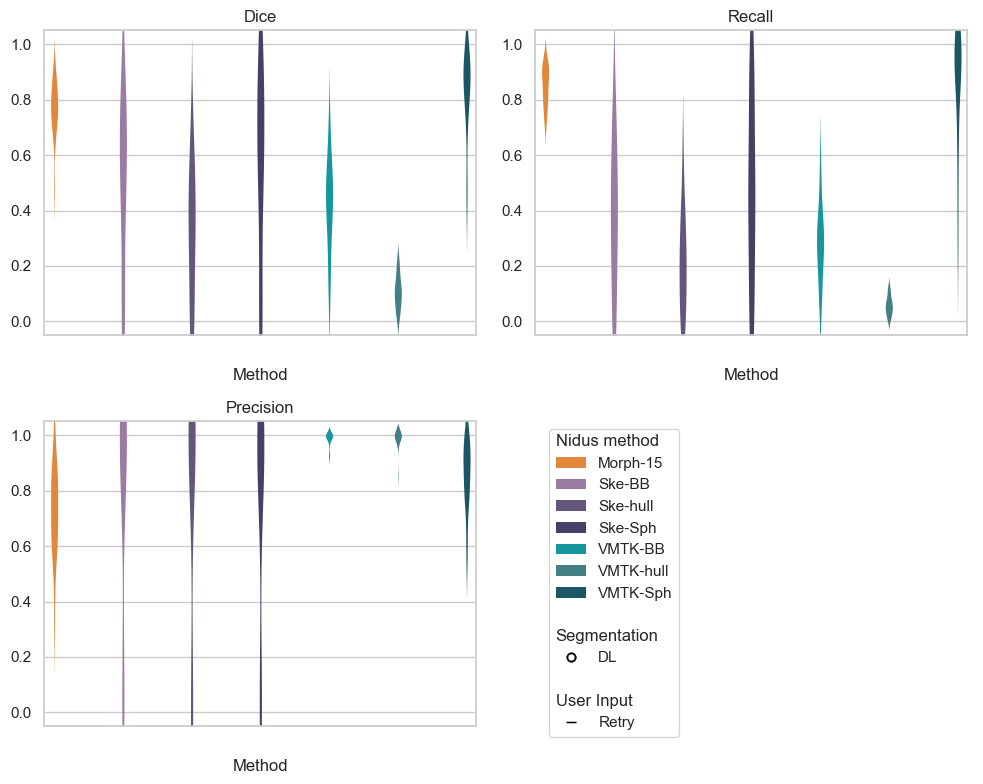

In [9]:
import matplotlib.path as mpath
from matplotlib.markers import MarkerStyle

palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']
#palette = ["#F49D1A","#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palettee = ["#FFFFFF","#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF","#FFFFFF", "#FFFFFF"]
paletteg = ["#999999", "#999999", "#999999", "#999999", "#999999", "#999999", "#999999"]
palettesubske = ["#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]

#dldice = datafile6[datafile6["Segmentation"]=="cl_dldice"]

sns.set_theme(style="whitegrid",font_scale = 1)
sns.set_style({'xtick.color' : "white"})
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

plt.setp(axes, yticks=list(np.arange(0, 1.2, 0.2)), ylim=[-0.05,1.05], xlim=[-0.5,6.5], xticks=[])
#sns.despine(left=True)
i =3
metrics = ["Dice", "Recall", "Precision"]
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans) #to shift the location

axescoords = [(0,0), (0,1), (1,0)]

# pnts = np.linspace(0, np.pi * 2.0, 40)
# circ = np.c_[np.sin(pnts) / 2, -np.cos(pnts) / 2]
# vert = np.r_[circ, circ[::-1] * .55]
# open_circle = matplotlib.path.Path(vert, closed=True) #Cirle with no fill
# kwargs = {'edgecolor':None,'linewidth':2,"facecolor":None}
#circle = mpath.Path.unit_circle()
bcircle = mpath.Path.circle(radius=1.0)
tcircle = mpath.Path.circle(radius=0.7)
cut_circle = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, tcircle.vertices[::-1, ...]]),
    codes=np.concatenate([bcircle.codes, tcircle.codes]))

linepath2 = mpath.Path([ (-1.0, 0.0), (-0.25, 0.0),(0.25, 0.0),(1.0, 0.0),(1.0, 0.0)],[mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,mpath.Path.CLOSEPOLY])
linepath = mpath.Path.hatch("|")
linepath3 = mpath.Path.unit_regular_polygon(2)
circle_line = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, linepath2.vertices]),
    codes=np.concatenate([bcircle.codes, linepath2.codes]))
linepath4 = mpath.Path([ (-0.9, 0.1), (-0.25, 0.1),(0.25, 0.1),(0.9, 0.1),
                                (0.9, 0.0),(0.25,  0.0),(-0.25,  0.0),(-0.9,  0.0),
                                (-0.9, -0.1),(-0.25, -0.1),(0.25, -0.1),(0.9, -0.1),
                                (0.9, -0.1) ],
                [mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, 
                mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,
                        mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, mpath.Path.CLOSEPOLY])

#print (circle_line.vertices)


for ax in range(i):
        subplotax=axes[axescoords[ax]]
        subdldice = datafile6[datafile6["Metric"] == metrics[ax]]
        #subdtries = subd[subd["Tries"] != 0]
        #subdd = dldice[dldice["Metric"] == metrics[ax]]
        subplotax.set_title(metrics[ax])
        subplotax.set_ylabel(metrics[ax])
        
        
        # sns.boxplot(x="Method", y="Value", data=subdldice, ax=subplotax,showmeans=True,
        #         meanline=True,
        #         meanprops={'color': '#999999', 'ls': '-', 'lw': 1},
        #         medianprops={'visible': False},
        #         whiskerprops={'visible': False},
        #         zorder=10,showfliers=False,
        #         showbox=False,
        #         showcaps=False,
        #         width=0.5)
        #sns.scatterplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palette, ax=subplotax, s=115, marker=cut_circle, lw=.5, ec="face")     
        
        sns.violinplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palette, ax=subplotax, scale="width", linewidth=0)     
        #sns.scatterplot(x='Method',y='Value', hue="Method",data=subdtries, palette=palettesubske, ax=subplotax, legend=False, s=95, marker=linepath4, lw=5, ec="face")
        # sns.scatterplot(x='Method',y='Value', hue="Method", data=subdtries, palette=palettesubske, ax=axes[ax], legend=False, s=100, marker=linepath4,
        #                         transform=axes[ax].transData+offset(8))
        #(
        # sns.objects.Plot(subm, x='Method',y='Value', color="Method", palette=palette, transform=axes[ax].transData+offset(4))
        # .add(sns.Dot(fill=False, stroke=2, pointsize=8))
        # .on(axes[ax])
        # )
        subplotax.set_ylabel("")
#axes[0].set_ylabel("Value")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
handles, labels = axes[0,0].get_legend_handles_labels()
handles.extend([#plt.Line2D([0,0],[0,0], linestyle=''),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=cut_circle, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=linepath4, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2)])
labels.extend([#"", 
                "DL", "Retry"])
for ax in axes:
        for subax in ax:
                subax.get_legend().remove()
axes[-1, -1].axis('off')

plt.legend(['Nidus method'] + handles[:7] + ['','Segmentation'] + handles[7:8] + ['','User Input'] + [handles[8]], 
          ['']         + labels[:7] + ['','']          + labels[7:8]+ ['','']          + [labels[8]],
           handler_map={str: LegendTitle({'fontsize': 12})},
          bbox_to_anchor=(0.35, 1.0)
        )
plt.tight_layout()
plt.show()
#fig.savefig("C:\\Users\\Camila\\Documents\\Doctorado\\dices\\svtcases-tries2b2mean.eps")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


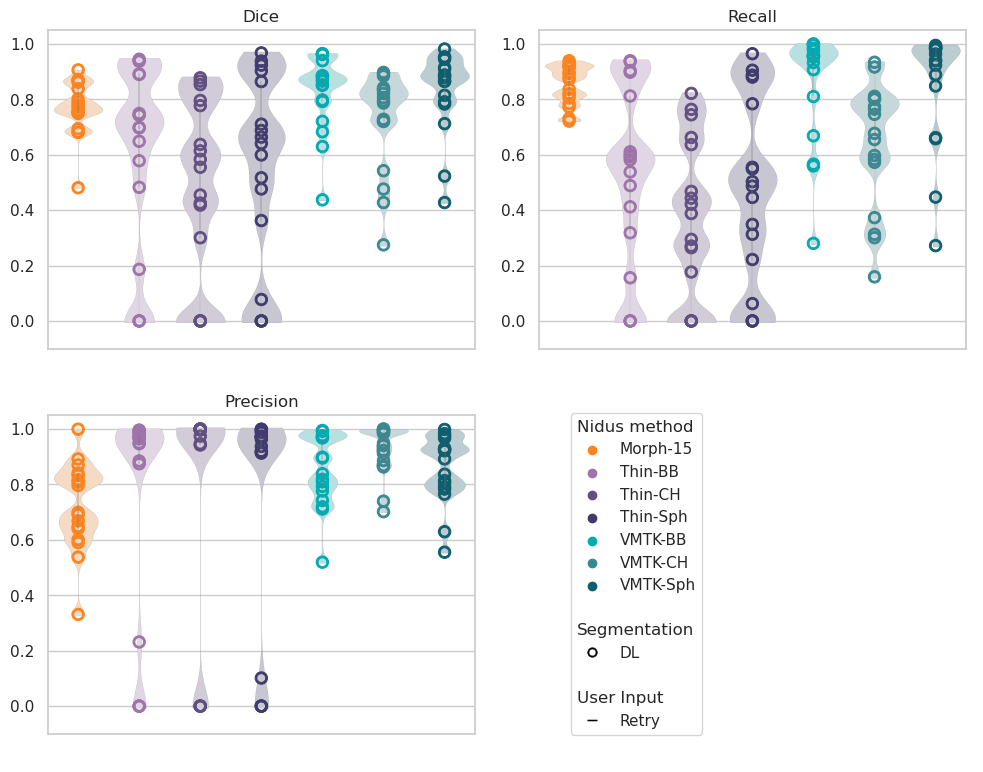

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [42]:
import matplotlib.path as mpath
from matplotlib.markers import MarkerStyle

palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']
#palette = ["#F49D1A","#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palettee = ["#FFFFFF","#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF","#FFFFFF", "#FFFFFF"]
paletteg = ["#999999", "#999999", "#999999", "#999999", "#999999", "#999999", "#999999"]
palettesubske = ["#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
def toalpha(hexcol):
        col = matplotlib.colors.to_rgb(hexcol)
        alpha = 0.3
        fcol = ((1.0-alpha)+alpha*col[0],(1.0-alpha)+alpha*col[1],(1.0-alpha)+alpha*col[2])
        return matplotlib.colors.to_hex(fcol)

palettealpha = [toalpha(col) for col in palette]

#dldice = datafile6[datafile6["Segmentation"]=="cl_dldice"]

sns.set_theme(style="whitegrid",font_scale = 1)
sns.set_style({'xtick.color' : "white"})
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

plt.setp(axes, yticks=list(np.arange(0, 1.2, 0.2)), ylim=[-0.1,1.05], xlim=[-5.25,9.5], xticks=[])
#sns.despine(left=True)
i =3
metrics = ["Dice", "Recall", "Precision"]
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans) #to shift the location

axescoords = [(0,0), (0,1), (1,0)]

bcircle = mpath.Path.circle(radius=1.0)
tcircle = mpath.Path.circle(radius=0.7)
cut_circle = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, tcircle.vertices[::-1, ...]]),
    codes=np.concatenate([bcircle.codes, tcircle.codes]))

linepath2 = mpath.Path([ (-1.0, 0.0), (-0.25, 0.0),(0.25, 0.0),(1.0, 0.0),(1.0, 0.0)],[mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,mpath.Path.CLOSEPOLY])
linepath = mpath.Path.hatch("|")
linepath3 = mpath.Path.unit_regular_polygon(2)
circle_line = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, linepath2.vertices]),
    codes=np.concatenate([bcircle.codes, linepath2.codes]))
linepath4 = mpath.Path([ (-0.9, 0.1), (-0.25, 0.1),(0.25, 0.1),(0.9, 0.1),
                                (0.9, 0.0),(0.25,  0.0),(-0.25,  0.0),(-0.9,  0.0),
                                (-0.9, -0.1),(-0.25, -0.1),(0.25, -0.1),(0.9, -0.1),
                                (0.9, -0.1) ],
                [mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, 
                mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,
                        mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, mpath.Path.CLOSEPOLY])

#print (circle_line.vertices)


for ax in range(i):
        subplotax=axes[axescoords[ax]]
        subdldice = datafile6[datafile6["Metric"] == metrics[ax]]
        #subdtries = subd[subd["Tries"] != 0]
        #subdd = dldice[dldice["Metric"] == metrics[ax]]
        subplotax.set_title(metrics[ax])
        subplotax.set_ylabel(metrics[ax])
        
        
        # sns.boxplot(x="Method", y="Value", data=subdldice, ax=subplotax,showmeans=True,
        #         meanline=True,
        #         meanprops={'color': '#999999', 'ls': '-', 'lw': 1},
        #         medianprops={'visible': False},
        #         whiskerprops={'visible': False},
        #         zorder=10,showfliers=False,
        #         showbox=False,
        #         showcaps=False,
        #         width=0.5)
        #sns.scatterplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palette, ax=subplotax, s=115, marker=cut_circle, lw=.5, ec="face")     
            
        sns.violinplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palettealpha, ax=subplotax, legend=False, scale="count", linewidth=0.1, cut=0.1, bw=.15, ec="face", dodge=False) 
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palette, ax=subplotax, s=80, marker=cut_circle, lw=.5, ec="face")
        #sns.scatterplot(x='Method',y='Value', hue="Method",data=subdtries, palette=palettesubske, ax=subplotax, legend=False, s=95, marker=linepath4, lw=5, ec="face")
        # sns.scatterplot(x='Method',y='Value', hue="Method", data=subdtries, palette=palettesubske, ax=axes[ax], legend=False, s=100, marker=linepath4,
        #                         transform=axes[ax].transData+offset(8))
        #(
        # sns.objects.Plot(subm, x='Method',y='Value', color="Method", palette=palette, transform=axes[ax].transData+offset(4))
        # .add(sns.Dot(fill=False, stroke=2, pointsize=8))
        # .on(axes[ax])
        # )
        subplotax.set_ylabel("")
        subplotax.set_xlabel("")
#axes[0].set_ylabel("Value")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
handles, labels = axes[0,0].get_legend_handles_labels()
handles.extend([#plt.Line2D([0,0],[0,0], linestyle=''),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=cut_circle, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=linepath4, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2)])
labels.extend([#"", 
                "DL", "Retry"])
for ax in axes:
        for subax in ax:
                subax.get_legend().remove()
axes[-1, -1].axis('off')
shft=7
plt.legend(['Nidus method'] + handles[shft:7+shft] + ['','Segmentation'] + handles[7+shft:8+shft] + ['','User Input'] + [handles[8+shft]], 
          ['']         + labels[shft:7+shft] + ['','']          + labels[7+shft:8+shft]+ ['','']          + [labels[8+shft]],
           handler_map={str: LegendTitle({'fontsize': 12})},
          bbox_to_anchor=(0.40, 1.03)
        )
plt.tight_layout()
plt.show()
fig.savefig("/media/camila/Datos/proyectos/newpipe_unsegm/classification/svtcases-2b2-violin-fixed.eps")

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

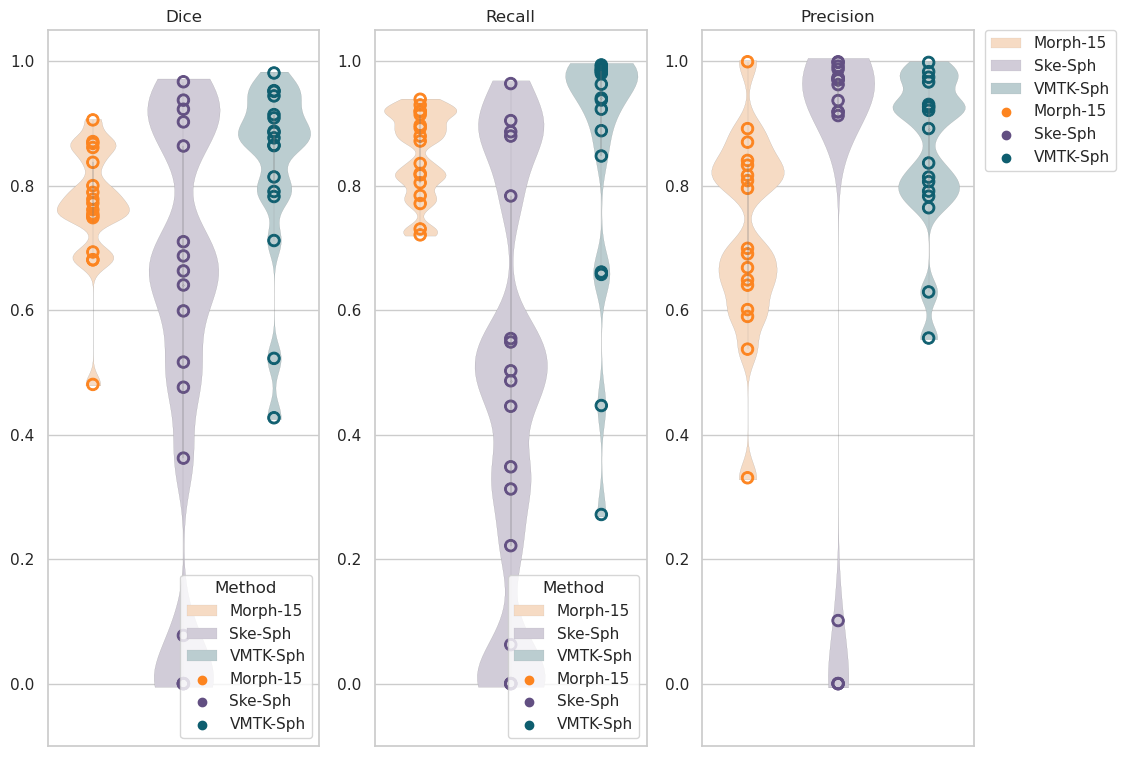

In [11]:
import matplotlib.path as mpath
from matplotlib.markers import MarkerStyle

palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']
#palette = ["#F49D1A","#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palette = ["#FD841F", "#624F82","#0E5E6F"]
palettee = ["#FFFFFF","#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF","#FFFFFF", "#FFFFFF"]
paletteg = ["#999999", "#999999", "#999999", "#999999", "#999999", "#999999", "#999999"]
palettesubske = ["#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
def toalpha(hexcol):
        col = matplotlib.colors.to_rgb(hexcol)
        alpha = 0.3
        fcol = ((1.0-alpha)+alpha*col[0],(1.0-alpha)+alpha*col[1],(1.0-alpha)+alpha*col[2])
        return matplotlib.colors.to_hex(fcol)

palettealpha = [toalpha(col) for col in palette]
datafile6cut= datafile6[(datafile6["Method"]=="Morph-15") | (datafile6["Method"]=="VMTK-Sph") | (datafile6["Method"]=="Ske-Sph")]
#dldice = datafile6[datafile6["Segmentation"]=="cl_dldice"]

sns.set_theme(style="whitegrid",font_scale = 1)
sns.set_style({'xtick.color' : "white"})
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

plt.setp(axes, yticks=list(np.arange(0, 1.2, 0.2)), ylim=[-0.1,1.05], xlim=[-5.25,9.5], xticks=[])
#sns.despine(left=True)
i =3
metrics = ["Dice", "Recall", "Precision"]
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans) #to shift the location

#axescoords = [(0,0), (0,1), (1,0)]
axescoords = [0,1,2]

bcircle = mpath.Path.circle(radius=1.0)
tcircle = mpath.Path.circle(radius=0.7)
cut_circle = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, tcircle.vertices[::-1, ...]]),
    codes=np.concatenate([bcircle.codes, tcircle.codes]))

linepath2 = mpath.Path([ (-1.0, 0.0), (-0.25, 0.0),(0.25, 0.0),(1.0, 0.0),(1.0, 0.0)],[mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,mpath.Path.CLOSEPOLY])
linepath = mpath.Path.hatch("|")
linepath3 = mpath.Path.unit_regular_polygon(2)
circle_line = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, linepath2.vertices]),
    codes=np.concatenate([bcircle.codes, linepath2.codes]))
linepath4 = mpath.Path([ (-0.9, 0.1), (-0.25, 0.1),(0.25, 0.1),(0.9, 0.1),
                                (0.9, 0.0),(0.25,  0.0),(-0.25,  0.0),(-0.9,  0.0),
                                (-0.9, -0.1),(-0.25, -0.1),(0.25, -0.1),(0.9, -0.1),
                                (0.9, -0.1) ],
                [mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, 
                mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,
                        mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, mpath.Path.CLOSEPOLY])

#print (circle_line.vertices)


for ax in range(i):
        subplotax=axes[axescoords[ax]]
        subdldice = datafile6cut[datafile6cut["Metric"] == metrics[ax]]
        #subdtries = subd[subd["Tries"] != 0]
        #subdd = dldice[dldice["Metric"] == metrics[ax]]
        subplotax.set_title(metrics[ax])
        subplotax.set_ylabel(metrics[ax])
        
        
        # sns.boxplot(x="Method", y="Value", data=subdldice, ax=subplotax,showmeans=True,
        #         meanline=True,
        #         meanprops={'color': '#999999', 'ls': '-', 'lw': 1},
        #         medianprops={'visible': False},
        #         whiskerprops={'visible': False},
        #         zorder=10,showfliers=False,
        #         showbox=False,
        #         showcaps=False,
        #         width=0.5)
        #sns.scatterplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palette, ax=subplotax, s=115, marker=cut_circle, lw=.5, ec="face")     
            
        sns.violinplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palettealpha, ax=subplotax, legend=False, scale="count", linewidth=0.1, cut=0.1, bw=.15, ec="face", dodge=False) 
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palette, ax=subplotax, s=80, marker=cut_circle, lw=.5, ec="face")
        #sns.scatterplot(x='Method',y='Value', hue="Method",data=subdtries, palette=palettesubske, ax=subplotax, legend=False, s=95, marker=linepath4, lw=5, ec="face")
        # sns.scatterplot(x='Method',y='Value', hue="Method", data=subdtries, palette=palettesubske, ax=axes[ax], legend=False, s=100, marker=linepath4,
        #                         transform=axes[ax].transData+offset(8))
        #(
        # sns.objects.Plot(subm, x='Method',y='Value', color="Method", palette=palette, transform=axes[ax].transData+offset(4))
        # .add(sns.Dot(fill=False, stroke=2, pointsize=8))
        # .on(axes[ax])
        # )
        subplotax.set_ylabel("")
        subplotax.set_xlabel("")
#axes[0].set_ylabel("Value")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
handles, labels = axes[0,0].get_legend_handles_labels()
handles.extend([#plt.Line2D([0,0],[0,0], linestyle=''),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=cut_circle, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=linepath4, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2)])
labels.extend([#"", 
                "DL", "Retry"])
for ax in axes:
        for subax in ax:
                subax.get_legend().remove()
axes[-1, -1].axis('off')
shft=3
plt.legend(['Nidus method'] + handles[shft:3+shft] + ['','Segmentation'] + handles[3+shft:4+shft] + ['','User Input'] + [handles[4+shft]], 
          ['']         + labels[shft:3+shft] + ['','']          + labels[3+shft:4+shft]+ ['','']          + [labels[4+shft]],
           handler_map={str: LegendTitle({'fontsize': 12})},
          bbox_to_anchor=(0.35, 1.0)
        )
plt.tight_layout()
plt.show()
fig.savefig("C:\\Users\\Camila\\Documents\\Doctorado\\dices\\svtcases-2b2-violin3methods.eps")

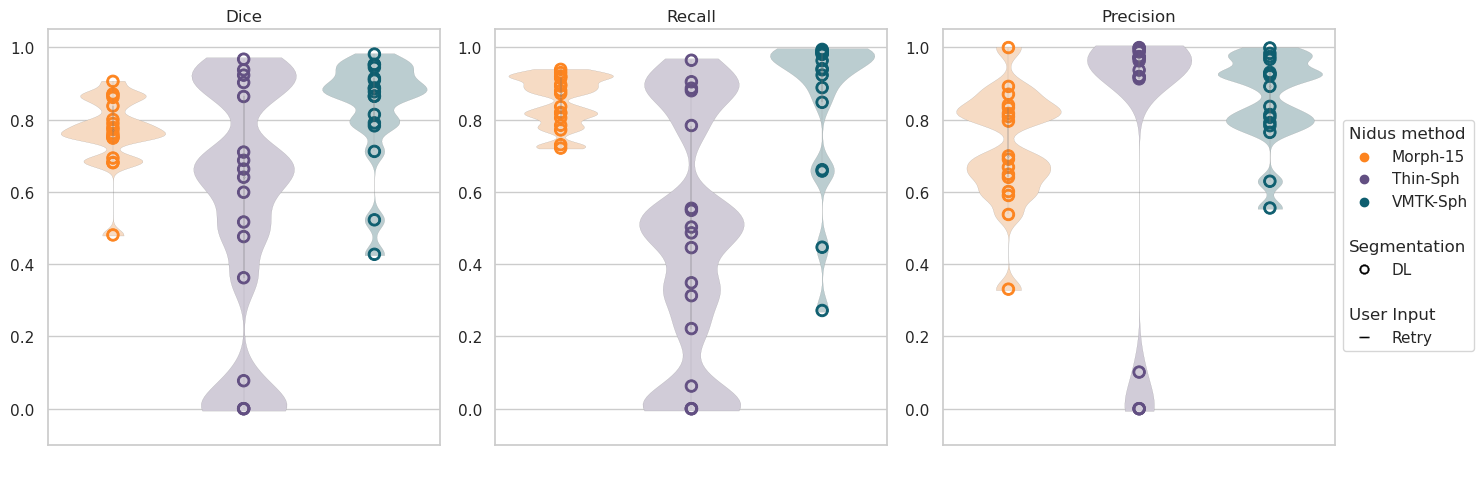

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [34]:
import matplotlib.path as mpath
from matplotlib.markers import MarkerStyle

palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']
#palette = ["#F49D1A","#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palette = ["#FD841F", "#624F82","#0E5E6F"]
palettee = ["#FFFFFF","#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF","#FFFFFF", "#FFFFFF"]
paletteg = ["#999999", "#999999", "#999999", "#999999", "#999999", "#999999", "#999999"]
palettesubske = ["#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
def toalpha(hexcol):
        col = matplotlib.colors.to_rgb(hexcol)
        alpha = 0.3
        fcol = ((1.0-alpha)+alpha*col[0],(1.0-alpha)+alpha*col[1],(1.0-alpha)+alpha*col[2])
        return matplotlib.colors.to_hex(fcol)

palettealpha = [toalpha(col) for col in palette]
datafile6cut= datafile6[(datafile6["Method"]=="Morph-15") | (datafile6["Method"]=="VMTK-Sph") | (datafile6["Method"]=="Thin-Sph")]
#dldice = datafile6[datafile6["Segmentation"]=="cl_dldice"]

sns.set_theme(style="whitegrid",font_scale = 1)
sns.set_style({'xtick.color' : "white"})
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.setp(axes, yticks=list(np.arange(0, 1.2, 0.2)), ylim=[-0.1,1.05], xlim=[-5.25,9.5], xticks=[])
#sns.despine(left=True)
i =3
metrics = ["Dice", "Recall", "Precision"]
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans) #to shift the location

#axescoords = [(0,0), (0,1), (1,0)]
axescoords = [0,1,2]

bcircle = mpath.Path.circle(radius=1.0)
tcircle = mpath.Path.circle(radius=0.7)
cut_circle = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, tcircle.vertices[::-1, ...]]),
    codes=np.concatenate([bcircle.codes, tcircle.codes]))

linepath2 = mpath.Path([ (-1.0, 0.0), (-0.25, 0.0),(0.25, 0.0),(1.0, 0.0),(1.0, 0.0)],[mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,mpath.Path.CLOSEPOLY])
linepath = mpath.Path.hatch("|")
linepath3 = mpath.Path.unit_regular_polygon(2)
circle_line = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, linepath2.vertices]),
    codes=np.concatenate([bcircle.codes, linepath2.codes]))
linepath4 = mpath.Path([ (-0.9, 0.1), (-0.25, 0.1),(0.25, 0.1),(0.9, 0.1),
                                (0.9, 0.0),(0.25,  0.0),(-0.25,  0.0),(-0.9,  0.0),
                                (-0.9, -0.1),(-0.25, -0.1),(0.25, -0.1),(0.9, -0.1),
                                (0.9, -0.1) ],
                [mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, 
                mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,
                        mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, mpath.Path.CLOSEPOLY])

#print (circle_line.vertices)


for ax in range(i):
        subplotax=axes[axescoords[ax]]
        subdldice = datafile6cut[datafile6cut["Metric"] == metrics[ax]]
        #subdtries = subd[subd["Tries"] != 0]
        #subdd = dldice[dldice["Metric"] == metrics[ax]]
        subplotax.set_title(metrics[ax])
        subplotax.set_ylabel(metrics[ax])
        
        
        # sns.boxplot(x="Method", y="Value", data=subdldice, ax=subplotax,showmeans=True,
        #         meanline=True,
        #         meanprops={'color': '#999999', 'ls': '-', 'lw': 1},
        #         medianprops={'visible': False},
        #         whiskerprops={'visible': False},
        #         zorder=10,showfliers=False,
        #         showbox=False,
        #         showcaps=False,
        #         width=0.5)
        #sns.scatterplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palette, ax=subplotax, s=115, marker=cut_circle, lw=.5, ec="face")     
            
        sns.violinplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palettealpha, ax=subplotax, legend=False, scale="count", linewidth=0.1, cut=0.1, bw=.15, ec="face", dodge=False) 
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palette, ax=subplotax, s=80, marker=cut_circle, lw=.5, ec="face")
        #sns.scatterplot(x='Method',y='Value', hue="Method",data=subdtries, palette=palettesubske, ax=subplotax, legend=False, s=95, marker=linepath4, lw=5, ec="face")
        # sns.scatterplot(x='Method',y='Value', hue="Method", data=subdtries, palette=palettesubske, ax=axes[ax], legend=False, s=100, marker=linepath4,
        #                         transform=axes[ax].transData+offset(8))
        #(
        # sns.objects.Plot(subm, x='Method',y='Value', color="Method", palette=palette, transform=axes[ax].transData+offset(4))
        # .add(sns.Dot(fill=False, stroke=2, pointsize=8))
        # .on(axes[ax])
        # )
        subplotax.set_ylabel("")
        subplotax.set_xlabel("")
#axes[0].set_ylabel("Value")
plt.tight_layout()
plt.legend(bbox_to_anchor=(0.4, 0.5), borderaxespad=0)
handles, labels = axes[0].get_legend_handles_labels()
handles.extend([#plt.Line2D([0,0],[0,0], linestyle=''),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=cut_circle, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=linepath4, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2)])
labels.extend([#"", 
                "DL", "Retry"])
for ax in axes:
    ax.get_legend().remove()
#axes[-1, -1].axis('off')
shft=3
plt.legend(['Nidus method'] + handles[shft:3+shft] + ['','Segmentation'] + handles[3+shft:4+shft] + ['','User Input'] + [handles[4+shft]], 
          ['']         + labels[shft:3+shft] + ['','']          + labels[3+shft:4+shft]+ ['','']          + [labels[4+shft]],
           handler_map={str: LegendTitle({'fontsize': 12})},
          bbox_to_anchor=(1.0, 0.8)
        )
plt.tight_layout()
plt.show()
fig.savefig("/media/camila/Datos/proyectos/newpipe_unsegm/classification/svtcases-2b2-violin3methods.eps")

In [19]:
import matplotlib.path as mpath
from matplotlib.markers import MarkerStyle

datafilemean5 = pd.read_csv("/media/camila/Datos4TB/proyectos/newpipe/classification/fivedices-fixed.csv")

datafilemean5 = datafilemean5[datafilemean5["Method"]!= "Morph-30"]

manual = datafilemean5[datafilemean5["Segmentation"]=="manual"]
dl = datafilemean5[datafilemean5["Segmentation"]=="dl"]

#manual[manual["Method"]=="Morph-15"]
methods = ["Morph-15", "Thin-BB", "Thin-CH", "Thin-Sph", "VMTK-BB", "VMTK-CH", "VMTK-Sph"]
metrics = ["Dice", "Recall", "Precision"]
segm = ["manual", "dl"]
for m in methods:
    for s in segm:
        print(s, m)
        for metr in metrics:
            print("${mean:.2f}\pm{std:.2f}$ &".format(mean=datafilemean5[(datafilemean5["Segmentation"]==s)&(datafilemean5["Method"]==m)&(datafilemean5["Metric"]==metr)].mean()["Value"],
            std=datafilemean5[(datafilemean5["Segmentation"]==s)&(datafilemean5["Method"]==m)&(datafilemean5["Metric"]==metr)].std()["Value"]))

manual Morph-15
$0.78\pm0.10$ &
$0.90\pm0.02$ &
$0.70\pm0.16$ &
dl Morph-15
$0.66\pm0.16$ &
$0.74\pm0.22$ &
$0.59\pm0.13$ &
manual Thin-BB
$0.57\pm0.22$ &
$0.43\pm0.21$ &
$0.98\pm0.03$ &
dl Thin-BB
$0.56\pm0.29$ &
$0.47\pm0.30$ &
$0.90\pm0.06$ &
manual Thin-CH
$0.38\pm0.20$ &
$0.25\pm0.15$ &
$0.99\pm0.03$ &
dl Thin-CH
$0.39\pm0.28$ &
$0.29\pm0.23$ &
$0.93\pm0.04$ &
manual Thin-Sph
$0.68\pm0.23$ &
$0.58\pm0.28$ &
$0.96\pm0.06$ &
dl Thin-Sph
$0.58\pm0.29$ &
$0.50\pm0.31$ &
$0.90\pm0.06$ &
manual VMTK-BB
$0.89\pm0.03$ &
$0.91\pm0.06$ &
$0.88\pm0.10$ &
dl VMTK-BB
$0.72\pm0.22$ &
$0.75\pm0.31$ &
$0.80\pm0.11$ &
manual VMTK-CH
$0.77\pm0.07$ &
$0.65\pm0.10$ &
$0.95\pm0.05$ &
dl VMTK-CH
$0.67\pm0.25$ &
$0.61\pm0.28$ &
$0.87\pm0.07$ &
manual VMTK-Sph
$0.90\pm0.05$ &
$0.94\pm0.04$ &
$0.86\pm0.11$ &
dl VMTK-Sph
$0.74\pm0.21$ &
$0.76\pm0.30$ &
$0.83\pm0.09$ &


/tmp/ipykernel_300862/430990796.py:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("${mean:.2f}\pm{std:.2f}$ &".format(mean=datafilemean5[(datafilemean5["Segmentation"]==s)&(datafilemean5["Method"]==m)&(datafilemean5["Metric"]==metr)].mean()["Value"],
/tmp/ipykernel_300862/430990796.py:20: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std=datafilemean5[(datafilemean5["Segmentation"]==s)&(datafilemean5["Method"]==m)&(datafilemean5["Metric"]==metr)].std()["Value"]))


In [30]:
import matplotlib.path as mpath
from matplotlib.markers import MarkerStyle

datafilemean17 = pd.read_csv("/media/camila/Datos4TB/proyectos/newpipe_unsegm/classification/svtdices-fixed-retries.csv")

datafilemean17 = datafilemean17[datafilemean17["Method"]!= "Morph-30"]

#manual[manual["Method"]=="Morph-15"]
methods = ["Morph-15", "Thin-BB", "Thin-CH", "Thin-Sph", "VMTK-BB", "VMTK-CH", "VMTK-Sph"]
metrics = ["Dice", "Recall", "Precision"]
segm = ["dl_cldice"]
for m in methods:
    for s in segm:
        print(s,m)
        for metr in metrics:
            print("${mean:.2f}\pm{std:.2f}$ &".format(mean=datafilemean17[(datafilemean17["Segmentation"]==s)&(datafilemean17["Method"]==m)&(datafilemean17["Metric"]==metr)].mean()["Value"],
            std=datafilemean17[(datafilemean17["Segmentation"]==s)&(datafilemean17["Method"]==m)&(datafilemean17["Metric"]==metr)].std()["Value"]))

dl_cldice Morph-15
$0.77\pm0.10$ &
$0.85\pm0.07$ &
$0.72\pm0.16$ &
dl_cldice Thin-BB
$0.72\pm0.20$ &
$0.62\pm0.24$ &
$0.96\pm0.04$ &
dl_cldice Thin-CH
$0.58\pm0.22$ &
$0.44\pm0.23$ &
$0.99\pm0.02$ &
dl_cldice Thin-Sph
$0.65\pm0.24$ &
$0.54\pm0.27$ &
$0.97\pm0.03$ &
dl_cldice VMTK-BB
$0.82\pm0.14$ &
$0.85\pm0.21$ &
$0.85\pm0.13$ &
dl_cldice VMTK-CH
$0.72\pm0.18$ &
$0.63\pm0.23$ &
$0.93\pm0.09$ &
dl_cldice VMTK-Sph
$0.83\pm0.15$ &
$0.85\pm0.21$ &
$0.85\pm0.12$ &


/tmp/ipykernel_300862/3579549763.py:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("${mean:.2f}\pm{std:.2f}$ &".format(mean=datafilemean17[(datafilemean17["Segmentation"]==s)&(datafilemean17["Method"]==m)&(datafilemean17["Metric"]==metr)].mean()["Value"],
/tmp/ipykernel_300862/3579549763.py:17: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std=datafilemean17[(datafilemean17["Segmentation"]==s)&(datafilemean17["Method"]==m)&(datafilemean17["Metric"]==metr)].std()["Value"]))


/tmp/ipykernel_300862/4283273513.py:80: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x='Method',y='Value', hue="Method",data=subdtries, palette=palettesubske, ax=subplotax, legend=False, s=70, marker=linepath4, lw=5, ec="face")
/tmp/ipykernel_300862/4283273513.py:80: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x='Method',y='Value', hue="Method",data=subdtries, palette=palettesubske, ax=subplotax, legend=False, s=70, marker=linepath4, lw=5, ec="face")
/tmp/ipykernel_300862/4283273513.py:80: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x='Method',y='Value', hue="Method",data=subdtries, palette=palettesubske, ax=subplotax, legend=False, s=70, marker=linepath4, lw=5, ec="face")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored 

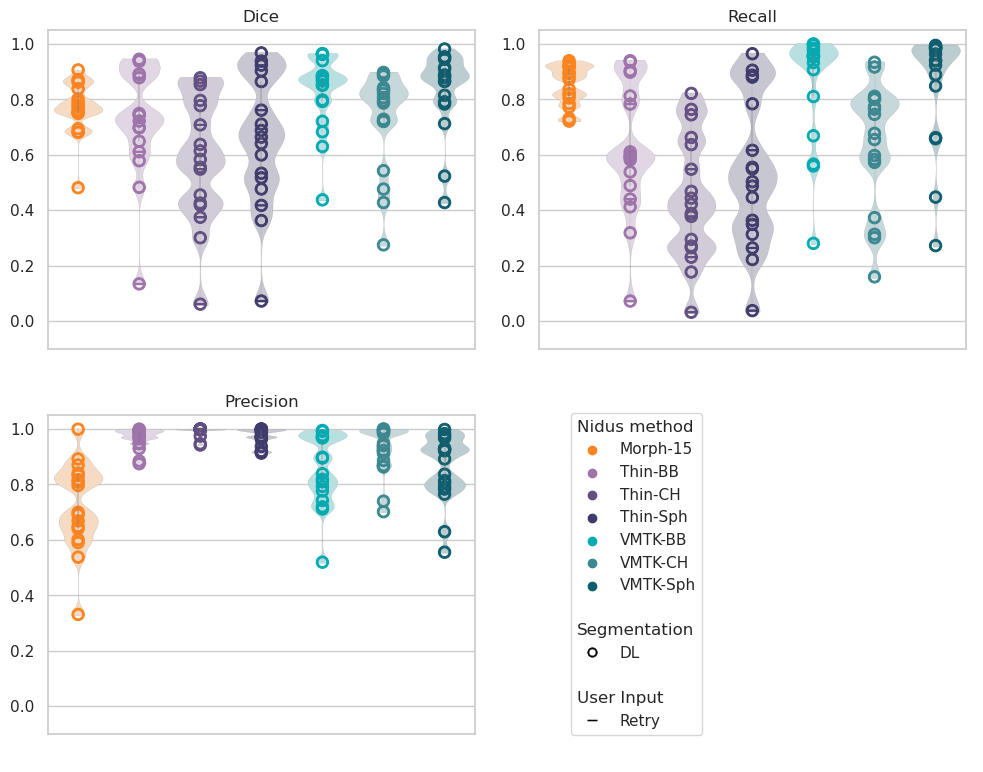

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [29]:
import matplotlib.path as mpath
from matplotlib.markers import MarkerStyle


datafile6 = pd.read_csv("/media/camila/Datos4TB/proyectos/newpipe_unsegm/classification/svtdices-fixed-retries.csv")

palette=['#9C2C77','#8D72E1','#0E5E6F','#2c89a0','#ffffff']
#palette = ["#F49D1A","#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palette = ["#FD841F", "#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
palettee = ["#FFFFFF","#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF","#FFFFFF", "#FFFFFF"]
paletteg = ["#999999", "#999999", "#999999", "#999999", "#999999", "#999999", "#999999"]
palettesubske = ["#9F73AB", "#624F82", "#3F3B6C", "#00ABB3","#3A8891", "#0E5E6F"]
def toalpha(hexcol):
        col = matplotlib.colors.to_rgb(hexcol)
        alpha = 0.3
        fcol = ((1.0-alpha)+alpha*col[0],(1.0-alpha)+alpha*col[1],(1.0-alpha)+alpha*col[2])
        return matplotlib.colors.to_hex(fcol)

palettealpha = [toalpha(col) for col in palette]

#dldice = datafile6[datafile6["Segmentation"]=="cl_dldice"]

sns.set_theme(style="whitegrid",font_scale = 1)
sns.set_style({'xtick.color' : "white"})
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

plt.setp(axes, yticks=list(np.arange(0, 1.2, 0.2)), ylim=[-0.1,1.05], xlim=[-5.25,9.5], xticks=[])
#sns.despine(left=True)
i =3
metrics = ["Dice", "Recall", "Precision"]
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans) #to shift the location

axescoords = [(0,0), (0,1), (1,0)]

bcircle = mpath.Path.circle(radius=1.0)
tcircle = mpath.Path.circle(radius=0.7)
cut_circle = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, tcircle.vertices[::-1, ...]]),
    codes=np.concatenate([bcircle.codes, tcircle.codes]))

linepath2 = mpath.Path([ (-1.0, 0.0), (-0.25, 0.0),(0.25, 0.0),(1.0, 0.0),(1.0, 0.0)],[mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,mpath.Path.CLOSEPOLY])
linepath = mpath.Path.hatch("|")
linepath3 = mpath.Path.unit_regular_polygon(2)
circle_line = mpath.Path(
    vertices=np.concatenate([bcircle.vertices, linepath2.vertices]),
    codes=np.concatenate([bcircle.codes, linepath2.codes]))
linepath4 = mpath.Path([ (-0.9, 0.1), (-0.25, 0.1),(0.25, 0.1),(0.9, 0.1),
                                (0.9, 0.0),(0.25,  0.0),(-0.25,  0.0),(-0.9,  0.0),
                                (-0.9, -0.1),(-0.25, -0.1),(0.25, -0.1),(0.9, -0.1),
                                (0.9, -0.1) ],
                [mpath.Path.MOVETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, 
                mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4,
                        mpath.Path.LINETO, mpath.Path.CURVE4,  mpath.Path.CURVE4,mpath.Path.CURVE4, mpath.Path.CLOSEPOLY])

#print (circle_line.vertices)


for ax in range(i):
        subplotax=axes[axescoords[ax]]
        subdldice = datafile6[datafile6["Metric"] == metrics[ax]]
        subdtries = subdldice[subdldice["Tries"] != 0]
        #subdd = dldice[dldice["Metric"] == metrics[ax]]
        subplotax.set_title(metrics[ax])
        subplotax.set_ylabel(metrics[ax])
        
        
        # sns.boxplot(x="Method", y="Value", data=subdldice, ax=subplotax,showmeans=True,
        #         meanline=True,
        #         meanprops={'color': '#999999', 'ls': '-', 'lw': 1},
        #         medianprops={'visible': False},
        #         whiskerprops={'visible': False},
        #         zorder=10,showfliers=False,
        #         showbox=False,
        #         showcaps=False,
        #         width=0.5)
        #sns.scatterplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palette, ax=subplotax, s=115, marker=cut_circle, lw=.5, ec="face")     
            
        sns.violinplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palettealpha, ax=subplotax, legend=False, scale="count", linewidth=0.1, cut=0.1, bw=.15, ec="face", dodge=False) 
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subdldice, palette=palette, ax=subplotax, s=80, marker=cut_circle, lw=.5, ec="face")
        sns.scatterplot(x='Method',y='Value', hue="Method",data=subdtries, palette=palettesubske, ax=subplotax, legend=False, s=70, marker=linepath4, lw=5, ec="face")
        # sns.scatterplot(x='Method',y='Value', hue="Method", data=subdtries, palette=palettesubske, ax=axes[ax], legend=False, s=100, marker=linepath4,
        #                         transform=axes[ax].transData+offset(8))
        #(
        # sns.objects.Plot(subm, x='Method',y='Value', color="Method", palette=palette, transform=axes[ax].transData+offset(4))
        # .add(sns.Dot(fill=False, stroke=2, pointsize=8))
        # .on(axes[ax])
        # )
        subplotax.set_ylabel("")
        subplotax.set_xlabel("")
#axes[0].set_ylabel("Value")
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
handles, labels = axes[0,0].get_legend_handles_labels()
handles.extend([#plt.Line2D([0,0],[0,0], linestyle=''),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=cut_circle, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2),
                      plt.Line2D([0,0],[0,0], markeredgecolor="black",
                      marker=linepath4, markerfacecolor='black', markersize=7,
                      mew=0.3,
                      linestyle='',
                      lw=2)])
labels.extend([#"", 
                "DL", "Retry"])
for ax in axes:
        for subax in ax:
                subax.get_legend().remove()
axes[-1, -1].axis('off')
shft=7
plt.legend(['Nidus method'] + handles[shft:7+shft] + ['','Segmentation'] + handles[7+shft:8+shft] + ['','User Input'] + [handles[8+shft]], 
          ['']         + labels[shft:7+shft] + ['','']          + labels[7+shft:8+shft]+ ['','']          + [labels[8+shft]],
           handler_map={str: LegendTitle({'fontsize': 12})},
          bbox_to_anchor=(0.40, 1.03)
        )
plt.tight_layout()
plt.show()
fig.savefig("/media/camila/Datos4TB/proyectos/newpipe_unsegm/classification/svtcases-2b2-violin-fixed-retries.eps")